## Setup

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
import warnings
warnings.filterwarnings('ignore')
nltk.download('punkt')
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (17,7)
plt.rcParams['font.size'] = 18

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Loading the Data

In [ ]:
!wget https://raw.githubusercontent.com/owncodezs/Cyberbullying-classification/main/Tamil/Test.csv
!wget https://raw.githubusercontent.com/owncodezs/Cyberbullying-classification/main/Tamil/train.csv
!wget https://raw.githubusercontent.com/owncodezs/Cyberbullying-classification/main/Tamil/tamil_offensive_full_dev.csv
!wget https://raw.githubusercontent.com/owncodezs/Cyberbullying-classification/main/Tamil/tamil_offensive_full_train.csv


--2023-10-20 15:27:48--  https://raw.githubusercontent.com/owncodezs/Cyberbullying-classification/main/Tamil/Test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217900 (213K) [text/plain]
Saving to: ‘Test.csv’

Test.csv            100%[===================>] 212.79K  --.-KB/s    in 0.006s  

2023-10-20 15:27:48 (32.1 MB/s) - ‘Test.csv’ saved [217900/217900]

--2023-10-20 15:27:48--  https://raw.githubusercontent.com/owncodezs/Cyberbullying-classification/main/Tamil/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1859

In [ ]:
train_set = pd.read_csv("/content/train.csv",
                   encoding = "utf-8",
                   engine = "python",
                   header = 0)

test_set = pd.read_csv("/content/Test.csv",
                   encoding = "utf-8",
                   engine = "python",
                   header = 0)
fire_train_set = pd.read_csv("/content/tamil_offensive_full_train.csv",
                   names=["text","category"],
                   encoding = "utf-8",
                   engine = "python")

fire_test_set = pd.read_csv("/content/tamil_offensive_full_dev.csv",
                   names=["text","category"],
                   encoding = "utf-8",
                   engine = "python")



In [ ]:
print("Train Dataset")
print(train_set.head(10))
print("\nInfo of Train Dataset\n")
print(train_set.info())

Train Dataset
      id                                               text category
0   tam1  திருமலை நாயக்கர் பேரவை சார்பாக படம் வெற்றி பெற...      NOT
1   tam2  இந்த ட்ரெய்லர் கூட பார்க்கிற மாதிரி இல்லை.. இத...      OFF
2   tam3  மைசூரு செட்டியார் சமூகத்தின் சார்பாக இப்படம் வ...      NOT
3   tam4  மொத்த சாதியும் ஒரு சாதிக்கு எதிரா நிக்குது.......      OFF
4   tam5                     only for விஜய் சேதுபதி and STR      NOT
5   tam6        உணமையாவே இது சைக்கோ படம் தான் ஒன்னுமே புரில      OFF
6   tam7  முத்தையா அண்ணனுக்கும் சாதி சாயம் பூசினார்கள் இ...      OFF
7   tam8  தமிழ்நாட்டில் மாற்று மொழி பேசும் அனைத்து மக்கள...      NOT
8   tam9  எங்களுக்கு மண்ணு பொண்ணு இரண்டுமே முக்கியம் அதி...      OFF
9  tam10  படம் அழகாக இருக்குங்க  அத விட எதார்த்தமாயிருக்...      NOT

Info of Train Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5877 entries, 0 to 5876
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        5877 n

In [ ]:
print("Tset Dataset")
print(test_set.head(10))
print("\nInfo of Test Dataset\n")
print(test_set.info())

Tset Dataset
            id                                               text category
0   tam_test_1  தலைவா STR இதுக்குதான் கதுருந்தோம் மாஸ் தலைவா t...      NOT
1   tam_test_2  நாயுடு மக்கள் சார்பாக திரைப்படம் வெற்றி பெற வா...      NOT
2   tam_test_3                     தில்லானா முயற்சி  தஞ்சை கோனார்      NOT
3   tam_test_4  திரௌபதியின் துகிலுறித்த போது காத்த கண்ணனின் யா...      NOT
4   tam_test_5  நான் தியேட்டர்லே படம் பார்த்து 35 வருஷமாச்சு! ...      NOT
5   tam_test_6  கொங்கு வேளாளர் கவுண்டர்கள் சார்பாக படம் வெற்றி...      NOT
6   tam_test_7  திருநெல்வேலி நாடார் சார்பாக இந்த படம் வெற்றி அ...      NOT
7   tam_test_8  கயவர்களை துவம்சம் செய்ய , ஆண்டைகளின் மானம்  கா...      NOT
8   tam_test_9  சிங்கம் 3னு சொன்னாங்க ஆனா ஒரு சிங்கத்தையும் கா...      OFF
9  tam_test_10  *அன்பே சிவம்*எங்களது பார்வையில்  . பார்த்து பக...      NOT

Info of Test Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtyp

In [ ]:
print("Fire Train Dataset")
print(fire_train_set.head(10))
print("\nInfo of Train Dataset\n")
print(fire_train_set.info())

Fire Train Dataset
                                                text       category
0                  movie vara level la Erika poguthu  Not_offensive
1  I love Ajith Kumar Vivegam movie inki mjy bht ...      not-Tamil
2          Padam nalla comedy padama irukum polaye..  Not_offensive
3  karthick subburaj anne .... intha padam vetri ...  Not_offensive
4  கவுண்டர் தேவர்.சார்பாக வெற்றி பெற வாழ்த்துக்கள் 🦁  Not_offensive
5  ippo intha trailer ah parkuravana oru like pod...  Not_offensive
6  En thalaivan yogi babu irukkaar. Padam vera le...  Not_offensive
7         Nerkonda parvai...  Sema sema sema trailer  Not_offensive
8     ஏய் இது 96 யார் ஏமாத்தறீங்க? செம பின்னிட்டீங்க  Not_offensive
9  படம் கண்டிப்பாக வெற்றி பெற வேண்டும் செம்ம vara...  Not_offensive

Info of Train Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35139 entries, 0 to 35138
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      35139 non-

In [ ]:
fire_train_set.head(10)

,text,category
0,movie vara level la Erika poguthu,Not_offensive
1,I love Ajith Kumar Vivegam movie inki mjy bht ...,not-Tamil
2,Padam nalla comedy padama irukum polaye..,Not_offensive
3,karthick subburaj anne .... intha padam vetri ...,Not_offensive
4,கவுண்டர் தேவர்.சார்பாக வெற்றி பெற வாழ்த்துக்கள் 🦁,Not_offensive
5,ippo intha trailer ah parkuravana oru like pod...,Not_offensive
6,En thalaivan yogi babu irukkaar. Padam vera le...,Not_offensive
7,Nerkonda parvai... Sema sema sema trailer,Not_offensive
8,ஏய் இது 96 யார் ஏமாத்தறீங்க? செம பின்னிட்டீங்க,Not_offensive
9,படம் கண்டிப்பாக வெற்றி பெற வேண்டும் செம்ம vara...,Not_offensive


In [ ]:
print("Fire Tset Dataset")
print(fire_test_set.head(10))
print("\nInfo of Test Dataset\n")
print(fire_test_set.info())

Fire Tset Dataset
                                                text  \
0                  Handsome hunk  keri vaa thalaivaa   
1  தென்காசி மாவட்டம் நாடார் சமுதாயம் சார்பாக வாழ்...   
2  je vous aime bravo pour clip de merde que j éc...   
3  சிறப்பு..... மேலும் இது போன்ற படைப்புகள் மிக அ...   
4                Vera level BGM .. semma  trailer. 🤞   
5  என்னடா பண்ணி வச்சிருக்கீங்க ?!!!! அந்த அம்மாவ ...   
6  #kaappaan is gonna be a massive hit ,#suriya #...   
7             250k likes to go.....Yaralam waiting 🥰   
8  Supar annan trailar semmaya iruku i am waiting...   
9                         Maranam we Luv u Surya ann   

                          category  
0                    Not_offensive  
1                    Not_offensive  
2                        not-Tamil  
3                    Not_offensive  
4                    Not_offensive  
5  Offensive_Targeted_Insult_Group  
6                    Not_offensive  
7                    Not_offensive  
8                    Not_offensi

In [ ]:
fire_test_set["category"].unique()
fire_test_set.drop(fire_test_set[ (fire_test_set['category'] == 'not-Tamil')].index, inplace=True)
fire_test_set["category"].replace("Not_offensive","NOT",inplace=True)
fire_test_set["category"].replace("Offensive_Targeted_Insult_Individual","OFF",inplace=True)
fire_test_set["category"].replace("Offensive_Untargetede","OFF",inplace=True)
fire_test_set["category"].replace("Offensive_Targeted_Insult_Other","OFF",inplace=True)
fire_test_set["category"].replace("Offensive_Targeted_Insult_Group","OFF",inplace=True)

# train
fire_train_set["category"].unique()
fire_train_set.drop(fire_train_set[ (fire_train_set['category'] == 'not-Tamil')].index, inplace=True)
fire_train_set["category"].replace("Not_offensive","NOT",inplace=True)
fire_train_set["category"].replace("Offensive_Targeted_Insult_Individual","OFF",inplace=True)
fire_train_set["category"].replace("Offensive_Untargetede","OFF",inplace=True)
fire_train_set["category"].replace("Offensive_Targeted_Insult_Other","OFF",inplace=True)
fire_train_set["category"].replace("Offensive_Targeted_Insult_Group","OFF",inplace=True)




In [ ]:
fire_test_set["category"].unique()

array(['NOT', 'OFF'], dtype=object)

In [ ]:
train_set = train_set.sample(frac=1, random_state=1).reset_index(drop=True)
test_set = test_set.sample(frac=1, random_state=1).reset_index(drop=True)
fire_train_set = fire_train_set.sample(frac=1, random_state=1).reset_index(drop=True)
fire_test_set = fire_test_set.sample(frac=1, random_state=1).reset_index(drop=True)
data = pd.concat([train_set, test_set,fire_train_set,fire_test_set], ignore_index=True)
data = data.drop(columns=['id'])
data.drop_duplicates(subset=['text'], inplace=True)

In [ ]:
data.head(10)

,text,category
0,வணக்கம் டா மாப்ள வேதாரண்யத்துலேருந்து.. தரமான ...,NOT
1,அப்ப 96 to 2016; வரைக்கும் ரஜினி அரசியலுக்கு வ...,OFF
2,அருமை எவதொட்டாலும் வெட்டுடா அடிச்சா திருப்பி அ...,OFF
3,எங்கள் சாதியின் குல தெய்வம் திரௌபதி அம்மன் அர...,NOT
4,trailer பார்த்துட்டு ஆய்த எழுத்து சூர்யா ஞாபகம...,NOT
5,நான் சார்ந்த devendira குல வேளாளர் சமுதாயம் சா...,NOT
6,விழிப்புணர்வு குழந்தை பருவத்தில் இருந்தே பெற்ற...,NOT
7,இத்தன பேரா? இவ்வளவு நாளா எங்கடா ஓழிஞ்சிட்டு இர...,OFF
8,ஐங்குலத்தோர் விஸ்வகுலம் சார்பாக படம் வெற்றியட...,NOT
9,1:33 ல இவ்வளவு அற்புதங்கள் ஆஹா னு சொன்னா அது ...,NOT


In [ ]:
print("Full Dataset")
print(data.head(10))
print("\nInfo of Full Dataset\n")
print(data.info())



Full Dataset
                                                text category
0  வணக்கம் டா மாப்ள வேதாரண்யத்துலேருந்து.. தரமான ...      NOT
1  அப்ப 96 to 2016; வரைக்கும் ரஜினி அரசியலுக்கு வ...      OFF
2  அருமை எவதொட்டாலும் வெட்டுடா அடிச்சா திருப்பி அ...      OFF
3  எங்கள் சாதியின் குல தெய்வம்  திரௌபதி அம்மன் அர...      NOT
4  trailer பார்த்துட்டு ஆய்த எழுத்து சூர்யா ஞாபகம...      NOT
5  நான் சார்ந்த devendira குல வேளாளர் சமுதாயம் சா...      NOT
6  விழிப்புணர்வு குழந்தை பருவத்தில் இருந்தே பெற்ற...      NOT
7  இத்தன பேரா? இவ்வளவு நாளா எங்கடா ஓழிஞ்சிட்டு இர...      OFF
8  ஐங்குலத்தோர்  விஸ்வகுலம் சார்பாக படம் வெற்றியட...      NOT
9  1:33 ல இவ்வளவு அற்புதங்கள்  ஆஹா னு சொன்னா அது ...      NOT

Info of Full Dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38214 entries, 0 to 44430
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      38214 non-null  object
 1   category  38214 non-null  object
dtypes: object(2)
memo

In [ ]:
data['category'].value_counts()

NOT    28833
OFF     9381
Name: category, dtype: int64

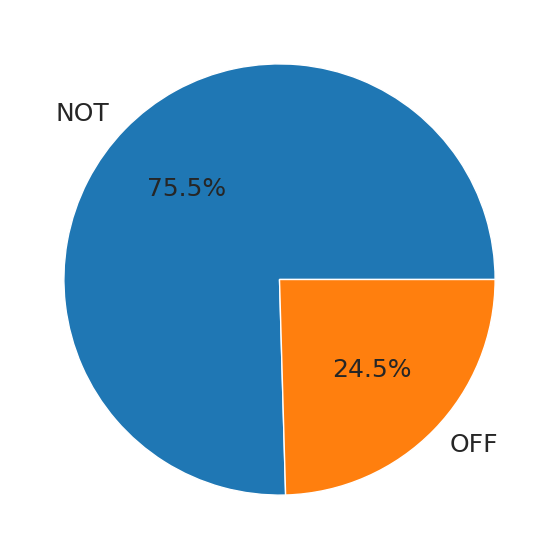

In [ ]:
plt.pie(data['category'].value_counts(), labels=data['category'].unique().tolist(), autopct='%1.1f%%')
plt.show()

## Exploratory Data Analysis

In [ ]:
lenght = len(data['text'][0])
print(f'Length of a sample commands: {lenght}')

Length of a sample commands: 72


In [ ]:
data['Length'] = data['text'].str.len()
data.head(10)

,text,category,Length
0,வணக்கம் டா மாப்ள வேதாரண்யத்துலேருந்து.. தரமான ...,NOT,72
1,அப்ப 96 to 2016; வரைக்கும் ரஜினி அரசியலுக்கு வ...,OFF,80
2,அருமை எவதொட்டாலும் வெட்டுடா அடிச்சா திருப்பி அ...,OFF,68
3,எங்கள் சாதியின் குல தெய்வம் திரௌபதி அம்மன் அர...,NOT,91
4,trailer பார்த்துட்டு ஆய்த எழுத்து சூர்யா ஞாபகம...,NOT,76
5,நான் சார்ந்த devendira குல வேளாளர் சமுதாயம் சா...,NOT,95
6,விழிப்புணர்வு குழந்தை பருவத்தில் இருந்தே பெற்ற...,NOT,209
7,இத்தன பேரா? இவ்வளவு நாளா எங்கடா ஓழிஞ்சிட்டு இர...,OFF,55
8,ஐங்குலத்தோர் விஸ்வகுலம் சார்பாக படம் வெற்றியட...,NOT,62
9,1:33 ல இவ்வளவு அற்புதங்கள் ஆஹா னு சொன்னா அது ...,NOT,76


#### **Word Count**: Number of words in a review

In [ ]:
word_count = data['text'][0].split()
print(f'Word count in a sample commands: {len(word_count)}')

Word count in a sample commands: 8


In [ ]:
def word_count(text):
    text_list = text.split()
    return len(text_list)

In [ ]:
data['Word_count'] = data['text'].apply(word_count)
data.head(10)

,text,category,Length,Word_count
0,வணக்கம் டா மாப்ள வேதாரண்யத்துலேருந்து.. தரமான ...,NOT,72,8
1,அப்ப 96 to 2016; வரைக்கும் ரஜினி அரசியலுக்கு வ...,OFF,80,11
2,அருமை எவதொட்டாலும் வெட்டுடா அடிச்சா திருப்பி அ...,OFF,68,8
3,எங்கள் சாதியின் குல தெய்வம் திரௌபதி அம்மன் அர...,NOT,91,12
4,trailer பார்த்துட்டு ஆய்த எழுத்து சூர்யா ஞாபகம...,NOT,76,10
5,நான் சார்ந்த devendira குல வேளாளர் சமுதாயம் சா...,NOT,95,13
6,விழிப்புணர்வு குழந்தை பருவத்தில் இருந்தே பெற்ற...,NOT,209,20
7,இத்தன பேரா? இவ்வளவு நாளா எங்கடா ஓழிஞ்சிட்டு இர...,OFF,55,7
8,ஐங்குலத்தோர் விஸ்வகுலம் சார்பாக படம் வெற்றியட...,NOT,62,6
9,1:33 ல இவ்வளவு அற்புதங்கள் ஆஹா னு சொன்னா அது ...,NOT,76,13


#### **Mean word length**: Average length of words

In [ ]:
data['mean_word_length'] = data['text'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
data.head(10)

,text,category,Length,Word_count,mean_word_length
0,வணக்கம் டா மாப்ள வேதாரண்யத்துலேருந்து.. தரமான ...,NOT,72,8,8.125000
1,அப்ப 96 to 2016; வரைக்கும் ரஜினி அரசியலுக்கு வ...,OFF,80,11,6.363636
2,அருமை எவதொட்டாலும் வெட்டுடா அடிச்சா திருப்பி அ...,OFF,68,8,7.625000
3,எங்கள் சாதியின் குல தெய்வம் திரௌபதி அம்மன் அர...,NOT,91,12,6.583333
4,trailer பார்த்துட்டு ஆய்த எழுத்து சூர்யா ஞாபகம...,NOT,76,10,6.500000
5,நான் சார்ந்த devendira குல வேளாளர் சமுதாயம் சா...,NOT,95,13,6.384615
6,விழிப்புணர்வு குழந்தை பருவத்தில் இருந்தே பெற்ற...,NOT,209,20,9.500000
7,இத்தன பேரா? இவ்வளவு நாளா எங்கடா ஓழிஞ்சிட்டு இர...,OFF,55,7,7.000000
8,ஐங்குலத்தோர் விஸ்வகுலம் சார்பாக படம் வெற்றியட...,NOT,62,6,9.333333
9,1:33 ல இவ்வளவு அற்புதங்கள் ஆஹா னு சொன்னா அது ...,NOT,76,13,4.846154


#### **Mean sentence length**: Average length of the sentences in the review

In [ ]:
np.mean([len(sent) for sent in tokenize.sent_tokenize(data['text'][0])])

72.0

In [ ]:
data['mean_sent_length'] = data['text'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
data.head(10)

,text,category,Length,Word_count,mean_word_length,mean_sent_length
0,வணக்கம் டா மாப்ள வேதாரண்யத்துலேருந்து.. தரமான ...,NOT,72,8,8.125000,72.0
1,அப்ப 96 to 2016; வரைக்கும் ரஜினி அரசியலுக்கு வ...,OFF,80,11,6.363636,80.0
2,அருமை எவதொட்டாலும் வெட்டுடா அடிச்சா திருப்பி அ...,OFF,68,8,7.625000,68.0
3,எங்கள் சாதியின் குல தெய்வம் திரௌபதி அம்மன் அர...,NOT,91,12,6.583333,91.0
4,trailer பார்த்துட்டு ஆய்த எழுத்து சூர்யா ஞாபகம...,NOT,76,10,6.500000,76.0
5,நான் சார்ந்த devendira குல வேளாளர் சமுதாயம் சா...,NOT,95,13,6.384615,95.0
6,விழிப்புணர்வு குழந்தை பருவத்தில் இருந்தே பெற்ற...,NOT,209,20,9.500000,209.0
7,இத்தன பேரா? இவ்வளவு நாளா எங்கடா ஓழிஞ்சிட்டு இர...,OFF,55,7,7.000000,27.0
8,ஐங்குலத்தோர் விஸ்வகுலம் சார்பாக படம் வெற்றியட...,NOT,62,6,9.333333,62.0
9,1:33 ல இவ்வளவு அற்புதங்கள் ஆஹா னு சொன்னா அது ...,NOT,76,13,4.846154,76.0


In [ ]:
import re

def contains_english_word(text):
    # Define a regular expression pattern to match English words
    pattern = r'\b[a-zA-Z]+\b'

    # Use re.search to find the first English word in the string
    match = re.search(pattern, text)

    # If a match is found, return True; otherwise, return False
    return bool(match)

# Assuming 'data' is your DataFrame with a 'text' column
data['isenglish'] = data['text'].apply(contains_english_word)


In [ ]:
data['isenglish'].value_counts()

# True      6682
# False    31532

True     31960
False     6254
Name: isenglish, dtype: int64

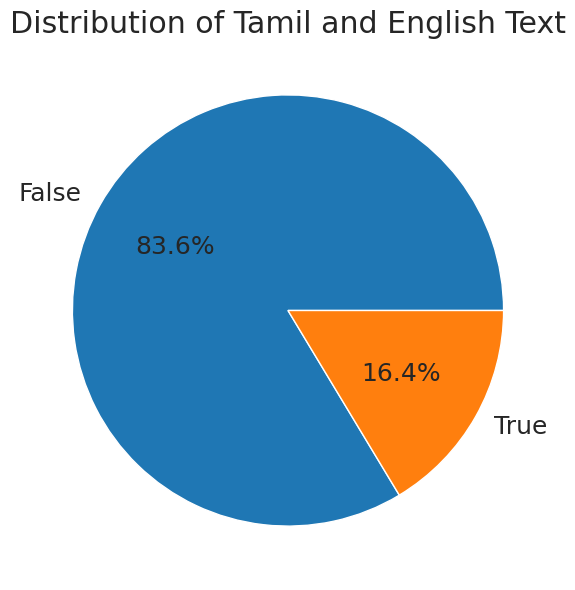

In [ ]:
plt.pie(data['isenglish'].value_counts(), labels=data["isenglish"].unique().tolist(), autopct='%1.1f%%')
plt.title('Distribution of Tamil and English Text')
plt.show()


In [ ]:
data['isenglish'].unique().tolist()


[False, True]

In [ ]:
data[data['isenglish']]

,text,category,Length,Word_count,mean_word_length,mean_sent_length,isenglish
1,அப்ப 96 to 2016; வரைக்கும் ரஜினி அரசியலுக்கு வ...,OFF,80,11,6.363636,80.0,True
4,trailer பார்த்துட்டு ஆய்த எழுத்து சூர்யா ஞாபகம...,NOT,76,10,6.500000,76.0,True
5,நான் சார்ந்த devendira குல வேளாளர் சமுதாயம் சா...,NOT,95,13,6.384615,95.0,True
16,Trailor வைத்து எதையும் முடிவு செய்து சண்டை போட...,NOT,137,16,7.625000,68.0,True
17,0:06 to 0:10 இந்த பகுதி போதும் படம் வேற லெவல்,NOT,45,9,4.111111,45.0,True
...,...,...,...,...,...,...,...
44426,Yov padam vera lvl la hit aaga poguthu,NOT,38,8,3.875000,38.0,True
44427,Super star fans hit like waiting,NOT,33,6,4.500000,33.0,True
44428,Seems to be Hindi Film Ek Tha Tiger Remake..,OFF,44,9,4.000000,44.0,True
44429,Apa idhulla sk van yarum illayada,OFF,33,6,4.666667,33.0,True


In [ ]:
data["text"].isna().sum()

0

# Translate dataset with Azure

In [ ]:
pip install requests uuid

  Preparing metadata (setup.py) ... done
  Created wheel for uuid: filename=uuid-1.30-py3-none-any.whl size=6479 sha256=c183b5bc5165906685f40a89b8328156360ddec0b5f8bfbd8dbc9b6ad68ca561
  Stored in directory: /root/.cache/pip/wheels/ed/08/9e/f0a977dfe55051a07e21af89200125d65f1efa60cbac61ed88
Successfully built uuid


In [ ]:
import requests, uuid, json

# Add your key and endpoint
key = "73d8bcdc30cb4ecc8fd5e457a1e5ceb3"
endpoint = "https://api.cognitive.microsofttranslator.com"

# location, also known as region.
# required if you're using a multi-service or regional (not global) resource. It can be found in the Azure portal on the Keys and Endpoint page.
location = "centralindia"

path = '/translate'
constructed_url = endpoint + path

params = {
    'api-version': '3.0',
    'from': 'en',
    'to': ['ta']
}

headers = {
    'Ocp-Apim-Subscription-Key': key,
    # location required if you're using a multi-service or regional (not global) resource.
    'Ocp-Apim-Subscription-Region': location,
    'Content-type': 'application/json',
    'X-ClientTraceId': str(uuid.uuid4())
}

# You can pass more than one object in body.
body = [{
    'text': 'I would really like to drive your car around the block a few times!'
}]

request = requests.post(constructed_url, params=params, headers=headers, json=body)
response = request.json()

print(json.dumps(response, sort_keys=True, ensure_ascii=False, indent=4, separators=(',', ': ')))

[
    {
        "translations": [
            {
                "text": "நான் உங்கள் காரை பிளாக்கைச் சுற்றி சில முறை ஓட்ட விரும்புகிறேன்!",
                "to": "ta"
            }
        ]
    }
]


In [ ]:
import pandas as pd
df = pd.read_csv("/content/Tamil_full_dataset.csv",
                   encoding = "utf-8",
                   engine = "python",
                   header = 0)


In [ ]:
from tqdm import tqdm
import re
# Define a function to translate English to Tamil
def translate_to_tamil(text):
  body = [{
    'text': text
    }]
  request = requests.post(constructed_url, params=params, headers=headers, json=body)
  response = request.json()
  return response[0]["translations"][0]["text"]



In [ ]:
from concurrent.futures import ProcessPoolExecutor
def translate_dataframe(row):
    english_word_pattern = re.compile(r'\b[a-zA-Z]+\b')
    if bool(english_word_pattern.search(row)):
        translated_text = translate_to_tamil(row)
        return translated_text
    return row
def translate_dataframe_parallel(df):
    with ProcessPoolExecutor() as executor:
        return list(tqdm(executor.map(translate_dataframe, df["text"]), total=len(df), desc="Translate and Remove duplicates"))

df['translate'] = translate_dataframe_parallel(df)


Translate and Remove duplicates: 100%|██████████| 38214/38214 [1:46:45<00:00,  5.97it/s]


In [ ]:
df.to_csv("translate.csv")

# After translate

In [ ]:
!wget https://raw.githubusercontent.com/owncodezs/Cyberbullying-classification/main/Tamil/translate_tamil.csv

--2023-10-20 15:28:28--  https://raw.githubusercontent.com/owncodezs/Cyberbullying-classification/main/Tamil/translate_tamil.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13105123 (12M) [text/plain]
Saving to: ‘translate_tamil.csv’

translate_tamil.csv 100%[===================>]  12.50M  --.-KB/s    in 0.05s   

2023-10-20 15:28:28 (233 MB/s) - ‘translate_tamil.csv’ saved [13105123/13105123]



In [ ]:
import pandas as pd
tdf = pd.read_csv("/content/translate_tamil.csv",
                   encoding = "utf-8",
                   engine = "python",
                   header = 0)

In [ ]:
tdf

,Unnamed: 0,text,category,Length,Word_count,mean_word_length,mean_sent_length,isenglish,translate
0,0,வணக்கம் டா மாப்ள வேதாரண்யத்துலேருந்து.. தரமான ...,NOT,72,8,8.125000,72.0,False,வணக்கம் டா மாப்ள வேதாரண்யத்துலேருந்து.. தரமான ...
1,1,அப்ப 96 to 2016; வரைக்கும் ரஜினி அரசியலுக்கு வ...,OFF,80,11,6.363636,80.0,True,அப்ப 96 to 2016; வரைக்கும் ரஜினி அரசியலுக்கு வ...
2,2,அருமை எவதொட்டாலும் வெட்டுடா அடிச்சா திருப்பி அ...,OFF,68,8,7.625000,68.0,False,அருமை எவதொட்டாலும் வெட்டுடா அடிச்சா திருப்பி அ...
3,3,எங்கள் சாதியின் குல தெய்வம் திரௌபதி அம்மன் அர...,NOT,91,12,6.583333,91.0,False,எங்கள் சாதியின் குல தெய்வம் திரௌபதி அம்மன் அர...
4,4,trailer பார்த்துட்டு ஆய்த எழுத்து சூர்யா ஞாபகம...,NOT,76,10,6.500000,76.0,True,trailer பார்த்துட்டு ஆய்த எழுத்து சூர்யா ஞாபகம...
...,...,...,...,...,...,...,...,...,...
38209,38209,Yov padam vera lvl la hit aaga poguthu,NOT,38,8,3.875000,38.0,True,Yov padam vera lvl la ஹிட் ஆக போகுது
38210,38210,Super star fans hit like waiting,NOT,33,6,4.500000,33.0,True,காத்திருப்பது போல் அதிர்ந்த சூப்பர் ஸ்டார் ரசி...
38211,38211,Seems to be Hindi Film Ek Tha Tiger Remake..,OFF,44,9,4.000000,44.0,True,ஹிந்தி படம் ஏக் தா டைகர் ரீமேக்..
38212,38212,Apa idhulla sk van yarum illayada,OFF,33,6,4.666667,33.0,True,அபா இதுல்லா எஸ்.கே வான் யாரும் இலையாடா


In [ ]:
tdf.drop(["isenglish","Length"],axis=1,inplace=True)

In [ ]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38214 entries, 0 to 38213
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        38214 non-null  int64  
 1   text              38214 non-null  object 
 2   category          38214 non-null  object 
 3   Word_count        38214 non-null  int64  
 4   mean_word_length  38214 non-null  float64
 5   mean_sent_length  38214 non-null  float64
 6   translate         38214 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 2.0+ MB


In [ ]:
import re

def contains_english_word(text):
    # Define a regular expression pattern to match English words
    pattern = r'\b[a-zA-Z]+\b'

    # Use re.search to find the first English word in the string
    match = re.search(pattern, text)

    # If a match is found, return True; otherwise, return False
    return bool(match)

# Assuming 'data' is your DataFrame with a 'text' column
tdf['isenglish'] = tdf['translate'].apply(contains_english_word)


In [ ]:
tdf["isenglish"].value_counts()

False    31532
True      6682
Name: isenglish, dtype: int64

In [ ]:
tdf[tdf['isenglish']]

,Unnamed: 0,text,category,Word_count,mean_word_length,mean_sent_length,translate,isenglish
1,1,அப்ப 96 to 2016; வரைக்கும் ரஜினி அரசியலுக்கு வ...,OFF,11,6.363636,80.0,அப்ப 96 to 2016; வரைக்கும் ரஜினி அரசியலுக்கு வ...,True
4,4,trailer பார்த்துட்டு ஆய்த எழுத்து சூர்யா ஞாபகம...,NOT,10,6.500000,76.0,trailer பார்த்துட்டு ஆய்த எழுத்து சூர்யா ஞாபகம...,True
5,5,நான் சார்ந்த devendira குல வேளாளர் சமுதாயம் சா...,NOT,13,6.384615,95.0,நான் சார்ந்த devendira குல வேளாளர் சமுதாயம் சா...,True
16,16,Trailor வைத்து எதையும் முடிவு செய்து சண்டை போட...,NOT,16,7.625000,68.0,Trailor வைத்து எதையும் முடிவு செய்து சண்டை போட...,True
17,17,0:06 to 0:10 இந்த பகுதி போதும் படம் வேற லெவல்,NOT,9,4.111111,45.0,0:06 to 0:10 இந்த பகுதி போதும் படம் வேற லெவல்,True
...,...,...,...,...,...,...,...,...
38198,38198,Etha vida engaluku ena venum...ne va Thala,NOT,7,5.142857,42.0,ஏத்தா விடா எங்கலுகு ena venum... நே வ தல,True
38199,38199,adaaraa adaaraa oly 19m views this oly 12m views,NOT,9,4.444444,48.0,adaaraa adaara oly 19m பார்வைகள் இந்த oly 12m ...,True
38201,38201,"0:55 ல இருந்து bgm பயங்கரமா இருக்கு,",NOT,6,5.166667,36.0,"0:55 ல இருந்து bgm பயங்கரமா இருக்கு,",True
38207,38207,Anna yathachum chance kudunga anna unga kuda w...,NOT,17,5.058824,102.0,அண்ணா யாத்தாச்சும் சான்ஸ் குடுங்கா அண்ணா உங்க ...,True


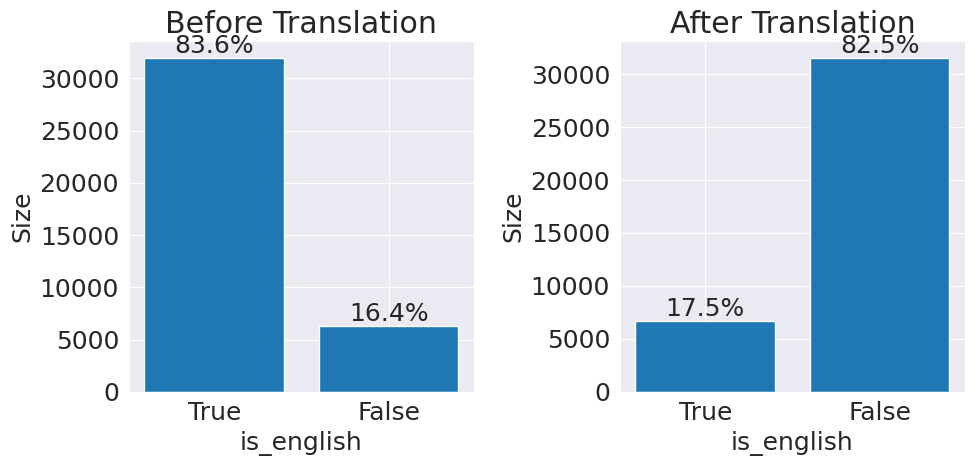

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

category_counts_data1 = [data['isenglish'].value_counts()[True], data['isenglish'].value_counts()[False]]
categories_data = ["True", "False"]

category_counts_data2 = [tdf['isenglish'].value_counts()[True], tdf['isenglish'].value_counts()[False]]
plt.figure(figsize=(15, 5))

plt.subplot2grid((1, 3), (0, 0))
plt.bar(categories_data, category_counts_data1)
plt.xlabel('is_english')
plt.ylabel('Size')
plt.title('Before Translation')
total_count_data1 = len(data)
percentages_data1 = [(count / total_count_data1) * 100 for count in category_counts_data1]
for i, percentage in enumerate(percentages_data1):
    plt.text(i, category_counts_data1[i], f'{percentage:.1f}%', ha='center', va='bottom')

plt.subplot2grid((1, 3), (0, 1))
plt.bar(categories_data, category_counts_data2)
plt.xlabel('is_english')
plt.ylabel('Size')
plt.title('After Translation')
total_count_data2 = len(tdf)
percentages_data2 = [(count / total_count_data2) * 100 for count in category_counts_data2]
for i, percentage in enumerate(percentages_data2):
    plt.text(i, category_counts_data2[i], f'{percentage:.1f}%', ha='center', va='bottom')

plt.tight_layout()  # This ensures that the subplots do not overlap
plt.show()
